In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def imshow(title: str = "", image: np.ndarray = None,subplot: bool= False,row: int =0,col: int =0,num: int=0) -> None:

    if subplot:
      plt.subplot(row,col,num)
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.axis('off')

    else:
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.axis('off')
      plt.show()



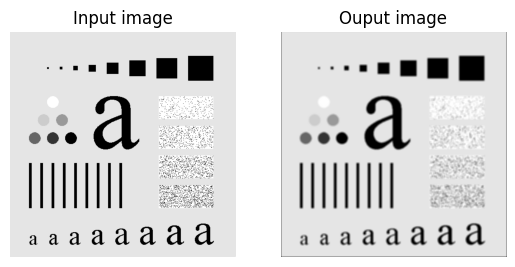

In [ ]:
matrix =np.array([[ 18,204,71,231,167],
 [30,196,24,80,114],
 [253,168,26,171,207],
 [149,71,251,93,231],
 [65,64,163,8,229],])


img = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0333(a)(test_pattern_blurring_orig).tif",0)

def box_filter(image, kernel_size):
    padded_image = np.pad(image, ((kernel_size//2, kernel_size//2), (kernel_size//2, kernel_size//2)), mode='constant')
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)
    filtered_image = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            filtered_image[i, j] = np.sum(padded_image[i:i + kernel_size, j:j + kernel_size] * kernel)
    return filtered_image.astype(np.uint8)


filtered_image =box_filter(img,5)
imshow("Input image",img,True,1,2,1)
imshow("Ouput image",filtered_image,True,1,2,2)

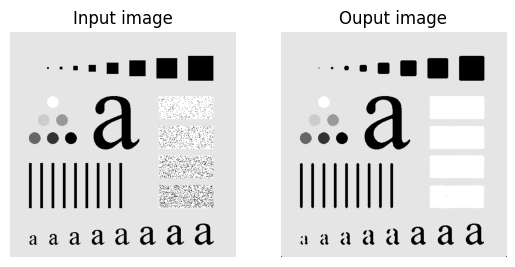

In [ ]:

def median_filter(image, kernel_size):
    padded_image = np.pad(image, ((kernel_size//2, kernel_size//2), (kernel_size//2, kernel_size//2)), mode='constant')
    filtered_image = np.zeros_like(image, dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i + kernel_size, j:j + kernel_size]
            filtered_image[i, j] = np.median(neighborhood)
    return filtered_image


filtered_image = median_filter(img,5)
imshow("Input image",img,True,1,2,1)
imshow("Ouput image",filtered_image,True,1,2,2)




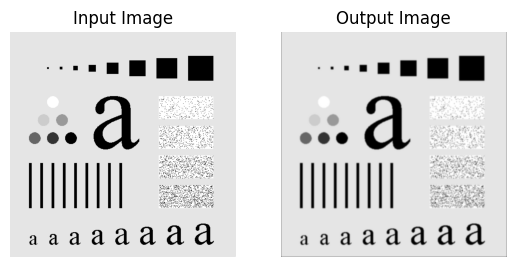

In [ ]:
def weighted_avg(img, sigma=1):
    filter_size = 2 * int(3 * sigma) + 1
    img_shape = img.shape
    CONSTANT = 0

    filter = np.empty((filter_size, filter_size))
    sum_filter = 0
    for i in range(filter_size):
        for j in range(filter_size):
            x = i - filter_size // 2
            y = j - filter_size // 2
            value = np.exp(-(x*x + y*y) / (2 * sigma**2))
            filter[i][j] = value
            sum_filter += value
    filter = filter / sum_filter


    pad_width = filter_size // 2
    img_padded = np.pad(img, pad_width=pad_width, mode='constant', constant_values=CONSTANT)


    filtered_img = np.zeros_like(img)
    for row in range(img_shape[0]):
        for col in range(img_shape[1]):
            region = img_padded[row:row+filter_size, col:col+filter_size]
            filtered_pixel = np.sum(region * filter)
            filtered_img[row, col] = np.round(filtered_pixel)

    return filtered_img

filtered_img = weighted_avg(img)
imshow("Input Image",img,True,1,2,1)
imshow("Output Image",filtered_img,True,1,2,2)



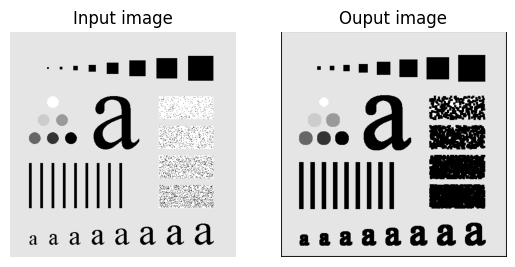

In [23]:
def min_filter(image, kernel_size):
    padded_image = np.pad(image, ((kernel_size//2, kernel_size//2), (kernel_size//2, kernel_size//2)), mode='constant')
    filtered_image = np.zeros_like(image, dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i + kernel_size, j:j + kernel_size]
            filtered_image[i, j] = np.min(neighborhood)
    return filtered_image


filtered_image = min_filter(img,5)
imshow("Input image",img,True,1,2,1)
imshow("Ouput image",filtered_image,True,1,2,2)



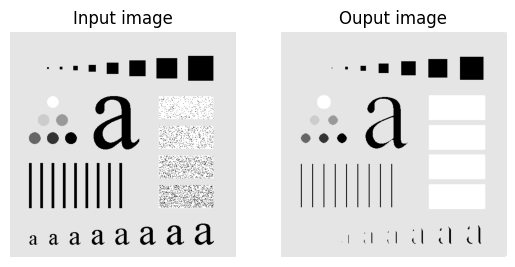

In [24]:
def max_filter(image, kernel_size):
    padded_image = np.pad(image, ((kernel_size//2, kernel_size//2), (kernel_size//2, kernel_size//2)), mode='constant')
    filtered_image = np.zeros_like(image, dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i + kernel_size, j:j + kernel_size]
            filtered_image[i, j] = np.max(neighborhood)
    return filtered_image


filtered_image = max_filter(img,5)
imshow("Input image",img,True,1,2,1)
imshow("Ouput image",filtered_image,True,1,2,2)

